# Particle Swarm Optimization (PSO)

* Algoritmo evolucionário
* Reproduzir comportamento de espécies

<img src = "images/birds.png" width = 800>

## Nearest Neighbor Velocity Matching
* Simular geograficamente o comportamento das espécies
* Copiar características do vizinho mais próximo

<img src="images/NN.png" width = 800>

In [31]:
import numpy as np

### Funções gerais

<img src="images/euclidean.png" width=300>

In [32]:
class Utils:
    
    @staticmethod
    def euclidean_distance(p1, p2):
        '''
        Calcula a distância euclidiana
        '''
        position_1 = np.array(p1.position)
        position_2 = np.array(p2.position)
        distance = np.sqrt(sum((position_1 - position_2)**2))
            
        return distance

### Classe de partículas

<img src = "images/particle.png" width = 400>

In [33]:
class Particle:
    def __init__(self, num_dimensions, bounds):
        '''
        Construtor
        '''
        self.num_dimensions = num_dimensions
        self.position = []
        self.velocity = []
        self.new_velocity = self.velocity
        self.closest = None
        self.min_dist = np.inf
        self.bounds = bounds

        # Para cada dimensão definir valores aleatórios entre os limites
        for i in range(self.num_dimensions):
            self.position.append(np.random.uniform(self.bounds[i][0], self.bounds[i][1]))
            self.velocity.append(np.random.uniform(self.bounds[i][0], self.bounds[i][1]))
            
    def __repr__(self):
        return f"\nPosition {self.position}\nVelocity {self.velocity}\n"
            
    def find_closest(self, swarm):
        '''
        Para cada partícula no enxame calcular a partícula mais próxima
        '''
        for particle in swarm:
            if particle == self:
                continue
            dist = Utils.euclidean_distance(self, particle)
            if dist < self.min_dist:
                self.min_dist = dist
                self.closest = particle

    def adjust_velocity(self):
        '''
        Ajustar a nova velocidade baseado na velocidade do vizinho
        '''
        self.new_velocity = self.closest.velocity
        
    def update_velocity(self):
        '''
        Atualizar a nova velocidade
        '''
        self.velocity = self.new_velocity

    def apply_craziness(self):
        '''
        Aplicar a operação 'craziness' no indivíduo
        '''
        craziness_velocity = []
        for i in range(self.num_dimensions):
            craziness_velocity.append(np.random.uniform(self.bounds[i][0], self.bounds[i][1]))
        self.velocity = craziness_velocity
        
    def update_position(self):
        '''
        Atualizando a posição
        '''
        self.position = list(np.array(self.position) + np.array(self.velocity))
                

### Classe do enxame

In [34]:
class Swarm:

    def __init__(self, particles):
        '''
        Construtor
        '''
        self.particles = particles

    def swarm_closest(self):
        '''
        Percorre todas as partículas e chama as funções para encontrar a partícula mais próxima e ajustar a nova velocidade
        '''
        for p in self.particles:
            p.find_closest(self.particles)
            p.adjust_velocity()

    def swarm_update_velocities(self):
        '''
        Percorre todas as partículas e chama a função para atualizar a velocidade
        '''
        for p in self.particles:
            p.update_velocity()

    def swarm_craziness(self, craziness_threshold):
        '''
        Percorre todas as partículas e chama a função para aplicar "craziness"
        '''
        for p in self.particles:
           if np.random.uniform(0, 1) < craziness_threshold:
               p.apply_craziness()

    def swarm_update_positions(self):
        '''
        Percorre todas as partículas e chama a função para atualizar a posição
        '''
        for p in self.particles:
            p.update_position()

    def swarm_mean_score(self):
        '''
        Calcula a pontuação média do enxame
        '''
        # Lendo a pontuação de cada partícula e colocando em uma lista
        scores = [p.min_dist for p in self.particles]
        return (sum(scores) / len(scores))

### Principal

In [35]:
CRAZINESS_PROBABILITY = 0.02
NUM_ITERATIONS = 20
NUM_PARTICLES = 100
NUM_DIMENSIONS = 2
BOUNDS = [(-30, 30), (-30, 30)]

if __name__ == "__main__":
    score_historic = []

    print("Starting")

    particles = []
    for i in range(NUM_PARTICLES):
        particles.append(Particle(NUM_DIMENSIONS, BOUNDS))

    swarm = Swarm(particles)

    print("Starting iterations")
    i = 0
    while i < NUM_ITERATIONS:
        print(f"Iteration {i}")

        swarm.swarm_closest()
        swarm.swarm_update_velocities()
        swarm.swarm_craziness(CRAZINESS_PROBABILITY)
        swarm.swarm_update_positions()

        score_historic.append(swarm.swarm_mean_score())

        i += 1

Starting
Starting iterations
Iteration 0
Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10
Iteration 11
Iteration 12
Iteration 13
Iteration 14
Iteration 15
Iteration 16
Iteration 17
Iteration 18
Iteration 19


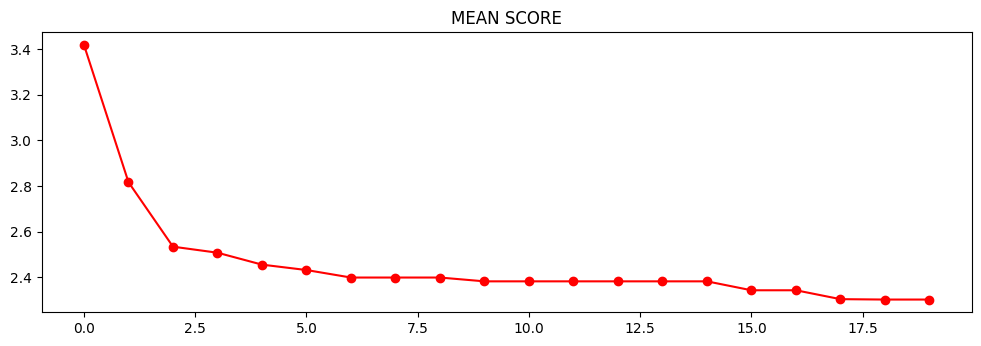

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12,8))

plt.subplot(2, 1, 2)
plt.title("MEAN SCORE")
plt.plot(score_historic, marker = 'o', color = 'red')

plt.show()